## Exercise 3.1
Run and listen to the examples in _chap03.ipynb_, which is in the repository for this book, and also available at [ThinkDSP - Chapter 3](http://tinyurl.com/thinkdsp03).

In the leakage example, try replacing the **Hamming window** with one of the other windows provided by _NumPy_, and see what effect they have on leakage.

See [NumPy Documentation](http://docs.scipy.org/doc/numpy/reference/routines.window.html)

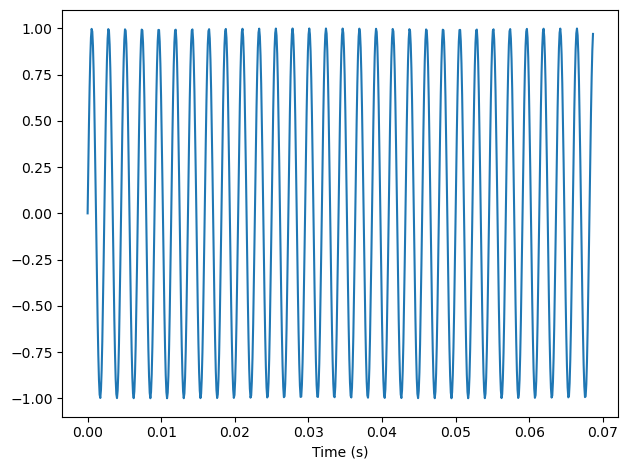

In [42]:
from thinkdsp_exercises import SinSignal, decorate

signal = SinSignal()
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave_blackman, wave_bartlett = wave, wave
wave.plot()
decorate(xlabel='Time (s)')

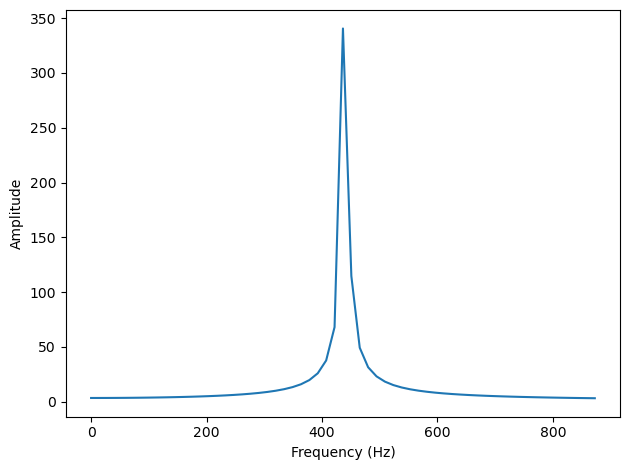

In [43]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

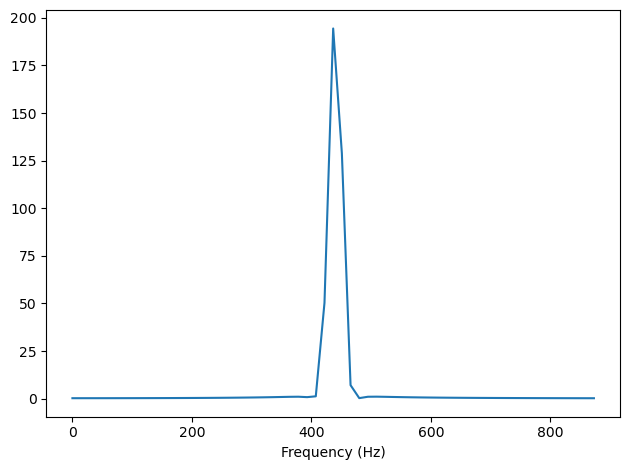

In [44]:
# Using Hamming window

wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

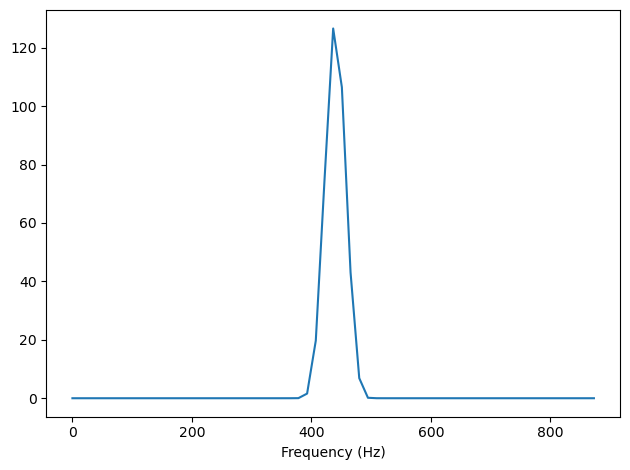

In [45]:
# Using Blackman window

from numpy import blackman

def blackman_window(wave):
        """Apply a Hamming window to the wave."""
        wave.ys *= blackman(len(wave.ys))

blackman_window(wave_blackman)
spectrum = wave_blackman.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

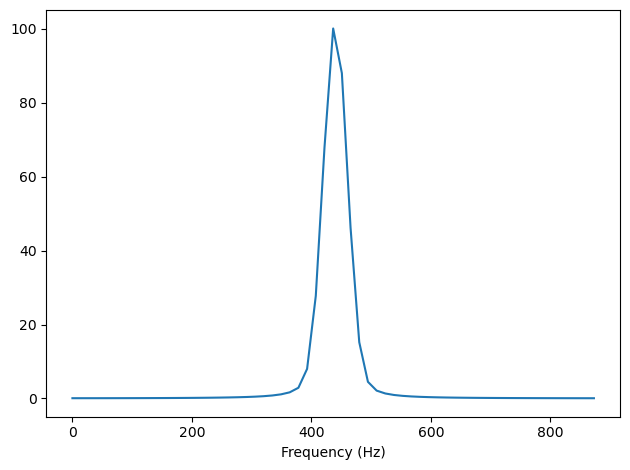

In [46]:
# Using Bartlett window

from numpy import bartlett

def bartlett_window(wave):
        """Apply a Hamming window to the wave."""
        wave.ys *= bartlett(len(wave.ys))

bartlett_window(wave_bartlett)
spectrum = wave_bartlett.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

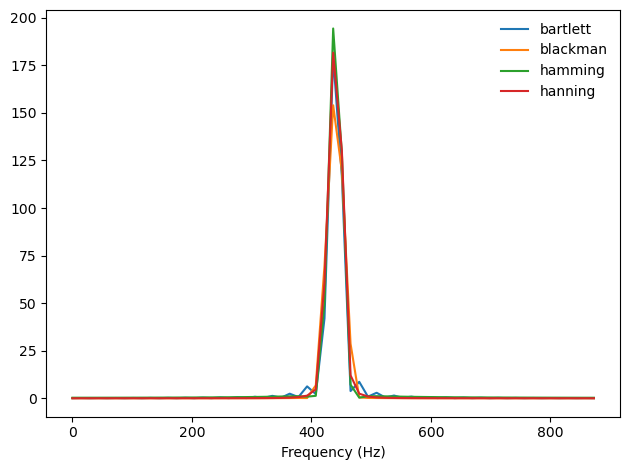

In [6]:
import numpy as np
from thinkdsp_exercises import SinSignal, decorate

signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)

decorate(xlabel='Frequency (Hz)')

# ===================================================================

## Exercise 3.2
Write a class called `SawtoothChirp` that extends `Chirp` and overrides evaluate to generate a _sawtooth_ waveform with frequency that increases (or decreases) **linearly**.

**Hint**: Combine the evaluate functions from `Chirp` and `SawtoothSignal`.

Draw a sketch of what you think the spectrogram of this signal looks like, and then plot it.

The effect of aliasing should be visually apparent, and if you listen carefully, you can hear it.

In [11]:
from thinkdsp_exercises import Chirp
from thinkdsp_exercises import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):

    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [9]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

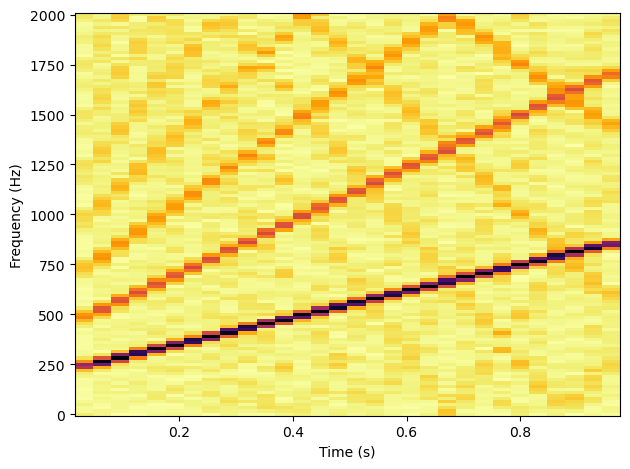

In [10]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

# ===================================================================

## Exercise 3.3
Make a _sawtooth chirp_ that sweeps from 2500 to 3000 Hz, then use it to make a wave with duration 1s and framerate 20 kHz.

Draw a sketch of what you think the spectrum will look like. Then plot the spectrum and see if you got it right.

In [12]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

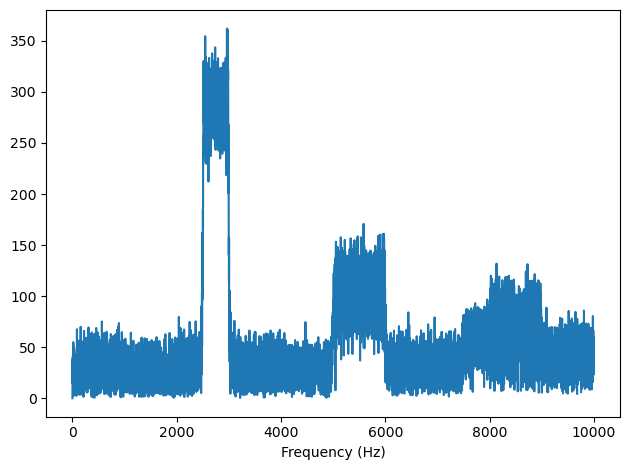

In [13]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

# ===================================================================

## Exercise 3.4
In musical terminology, a “glissando” is a note that slides from one pitch to another, so it is similar to a chirp.

Find or make a recording of a glissando and plot a spectrogram of the first few seconds.

**One suggestion**: _George Gershwin’s Rhapsody in Blue_ starts with a famous clarinet glissando, which you can download from [Rhapsody in Blue](http://archive.org/details/rhapblue11924).

In [16]:
from thinkdsp_exercises import read_wave

wave = read_wave('../72475__rockwehrmann__glissup02.wav')
wave.make_audio()

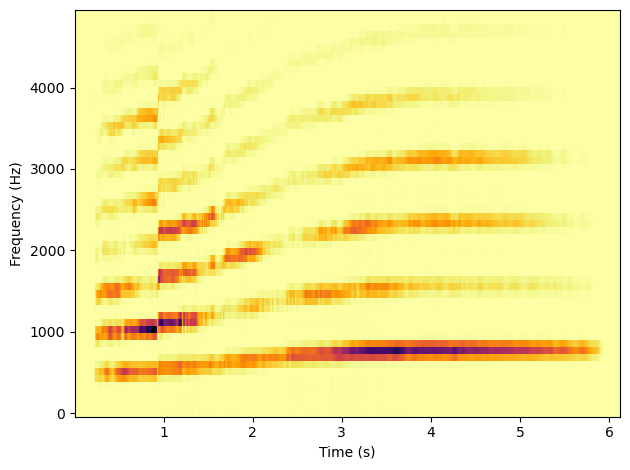

In [17]:
wave.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

# ===================================================================

## Exercise 3.5
A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length.

Assuming that the player moves the slide at a constant speed, how does frequency vary with time?

Write a class called `TromboneGliss` that extends `Chirp` and provides _evaluate_. Make a wave that simulates a trombone glissando from C3 up to F3 and back down to C3.

_C3 is 262 Hz; F3 is 349 Hz._

Plot a **spectrogram** of the resulting wave. Is a trombone glissando more like a linear or exponential chirp?

In [18]:
class TromboneGliss(Chirp):
    
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [19]:
# First part of the wave

low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [20]:
# Second part of the wave

signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [21]:
# Adding them

wave = wave1 | wave2
wave.make_audio()

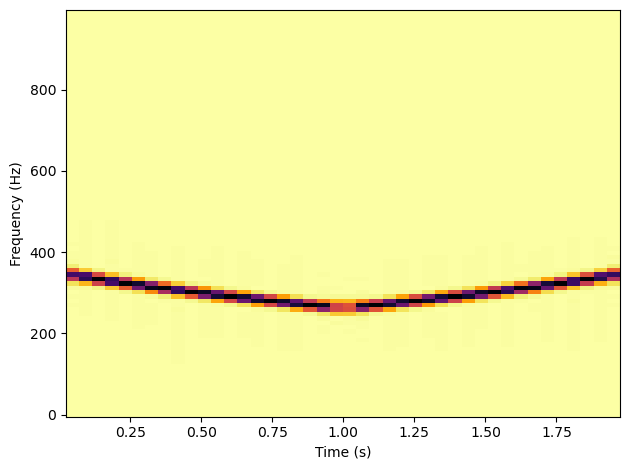

In [22]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

# ===================================================================

## Exercise 3.6
Make or find a recording of a series of _vowel sounds_ and look at the spectrogram. Can you identify different vowels?

In [23]:
wave = read_wave('../87778__marcgascon7__vocals.wav')
wave.make_audio()

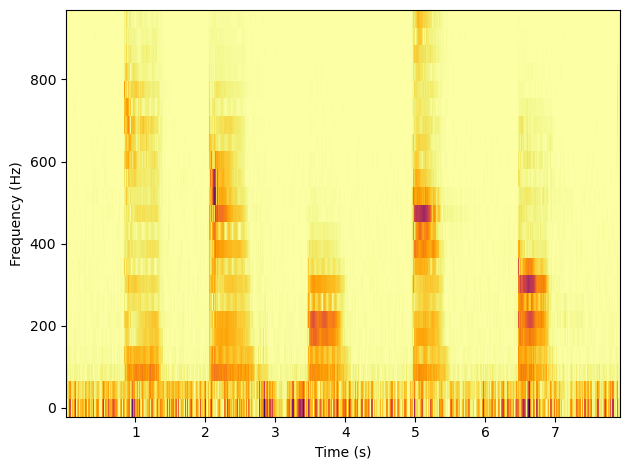

In [24]:
wave.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

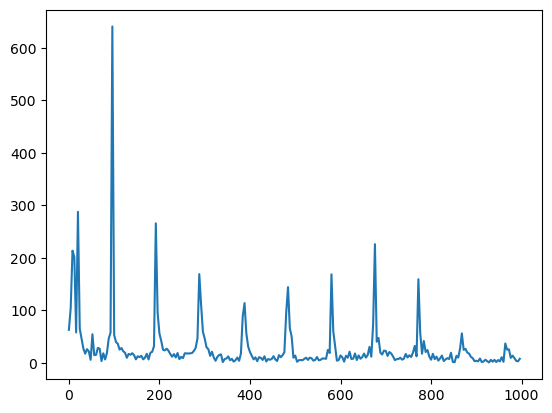

In [25]:
# 'ah' sound

high = 1000

segment = wave.segment(start=1, duration=0.25)
segment.make_spectrum().plot(high=high)

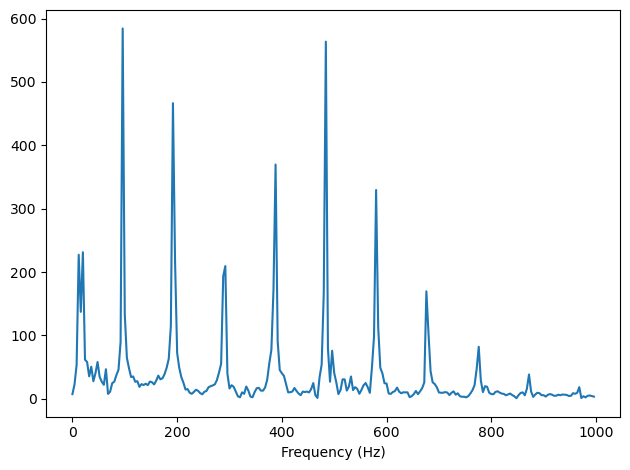

In [26]:
# 'eh' sound

segment = wave.segment(start=2.2, duration=0.25)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

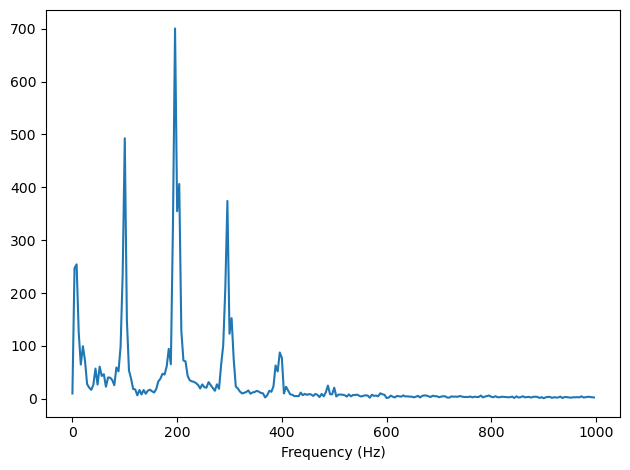

In [27]:
# 'ih' sound

segment = wave.segment(start=3.5, duration=0.25)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

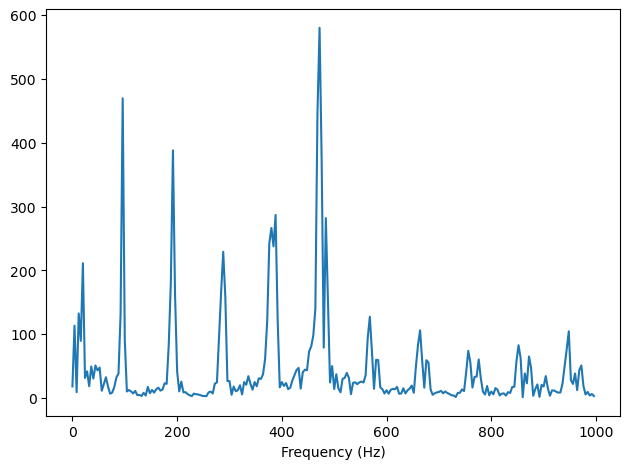

In [28]:
# 'oh' sound

segment = wave.segment(start=5.1, duration=0.25)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')

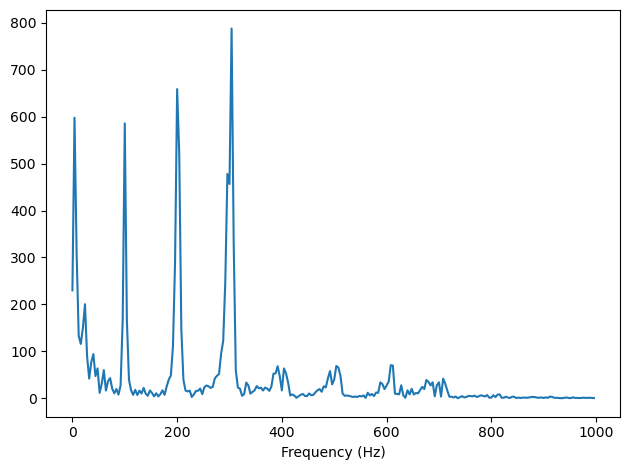

In [29]:
 # 'uh' sound

segment = wave.segment(start=6.5, duration=0.25)
segment.make_spectrum().plot(high=high)
decorate(xlabel='Frequency (Hz)')